
# Investigating Appointments' No Show Dataset

## Table of Contents
<ul>
    <a href="#top"> </a>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
    <ol> 
    <li><a href="#properties">General Properties</a></li>
    <li><a href="#errors">Checking for errors and problems</a></li>
    <li><a href="#fixes">Needed Fixes and Feature Engineering</a></li>
    <li><a href="#final">Final Dataset</a></li>
    <li><a href="#descriptives">Statistics and Visuals </a></li>
    </ol>
    <br>
     
<li><a href="#eda">Exploratory Data Analysis</a></li>
    <ol>
    <li><a href="#q1">Is Age a factor leading to not showing up to appointments?</a></li>
    <li><a href="#q2">Is Gender a factor leading to not showing up to appointments?</a></li>
    <li><a href="#q3">Does receiving an SMS or Scholarship decrease the no show ratio?</a></li>
    <li><a href="#q4">Is the appointment's Day of the Week a ruling factor in no show?</a></li>
    <li><a href="#q5">Is the number of missed appointments a ruling factor in no show?</a></li>
    <li><a href="#overview">Overview</a></li>
    </ol>
    <br>
<li><a href="#forest">Feature Importance</a></li>
<br>
<li><a href="#conclusions">Conclusion</a></li>
</ul>

<a id='intro'></a>
## Introduction
<br>
<div style="text-align: justify">In this project, I will investigate the No-show appointments dataset available from Kaggle. The problem and dataset description can be found on <a href="https://your-site.com">https://www.kaggle.com/joniarroba/noshowappointments/home</a>.</div>

<div style="text-align: justify">For this project, I will first import the needed packages. I will then investigate the data more closely, by inspecting variables type, missing values, unique values, duplicates, spelling errors, values error and multiple other elements to reach a dataset that is well prepared for exploration. This is the Data Wrangling part, at the end of which I will present visuals on the different variable statistics.
For the second part of the project, I will be exploring multiple questions to understand what factors are influencing our dependent variable "no-show". </div>
<div style="text-align: justify">Based on theses findings, conclusion summaries will be discussed as a last section in this notebook. </div>

In [1]:
#Importing needed packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
from matplotlib.ticker import MaxNLocator
import seaborn as sns 

<a id='wrangling'></a>
## Data Wrangling
<br>
Data type investigation, fixing and cleaning will be done in this section.

In [2]:
# Loading data
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

<a id='Properties'></a>
### General Properties

In [3]:
df.shape

(110527, 14)

The dataset consists of 14 columns/ variables and 110,527 rows/ instances. <br>
In the following, we check the column names and header to better understand the variable. <br>
We also check for missing values, duplicates and the number of unique values per variable.

In [4]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [5]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
#checking for number of unique values of each variable
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [7]:
#checking for duplicate rows in the data
sum(df.duplicated())

0

No duplicates in the dataset.

In [8]:
#checking for missing values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

No missing values in this dataset as well. 
Let's now check the problematic areas of this dataset.

<a id='errors'></a>
### Checking for errors and problems

Now we check for possible errors in the dataset by running .info() and .describe() methods.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [10]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


From the commands run above, we see that there are some columns with spelling errors such as "Handcap" and "Hipertension". We also need to re-write the dependent variable name. <br>
Some columns have wrong data types, such as "PatientId" which should be of integer type,and "ScheduleDay" and "AppointmentDay" should be date type. There are some columns with error values such as "Age" having negative values (-1). "Handcap" is supposed to be a True/False variable, we however see values from 0 to 4.

<a id='fixes'></a>
### Needed Fixes and Feature Engineering

Let's Start with the "PatientId" problem. First let's check how many unique Id's the dataset contains.

In [11]:
# number of unique patient and appointment IDs
df.loc[:,['PatientId', 'AppointmentID']].nunique()

PatientId         62299
AppointmentID    110527
dtype: int64

Each row correspond to a unique appointment whereas one patient could have multiple appointments/ rows. <br>

In [12]:
# After inspecting the problems with the data, let's start correcting them
''' "PatientId" has an erroneous type of data and should be changed to integer,
    let's check how many times does this error occur.'''

print(df[~ df.PatientId.apply(lambda x: x.is_integer())])


#5 rows have this error only and they are all no-shows, so they won't add much info compared to the 100k+ records
#so we drop them using their index values
df.drop([df.index[3950] , df.index[73228],df.index[73303],df.index[100517],df.index[105430]],inplace=True)
df.shape

           PatientId  AppointmentID Gender          ScheduledDay  \
3950     93779.52927        5712759      F  2016-05-18T09:12:29Z   
73228   537615.28476        5637728      F  2016-04-29T07:19:57Z   
73303   141724.16655        5637648      M  2016-04-29T07:13:36Z   
100517   39217.84439        5751990      F  2016-05-31T10:56:41Z   
105430   43741.75652        5760144      M  2016-06-01T14:22:58Z   

              AppointmentDay  Age   Neighbourhood  Scholarship  Hipertension  \
3950    2016-05-18T00:00:00Z   33          CENTRO            0             0   
73228   2016-05-06T00:00:00Z   14  FORTE SÃO JOÃO            0             0   
73303   2016-05-02T00:00:00Z   12  FORTE SÃO JOÃO            0             0   
100517  2016-06-03T00:00:00Z   44    PRAIA DO SUÁ            0             0   
105430  2016-06-01T00:00:00Z   39     MARIA ORTIZ            0             0   

        Diabetes  Alcoholism  Handcap  SMS_received No-show  
3950           0           0        0           

(110522, 14)

In [13]:
#Make sure column type is corrected
df['PatientId'] =  df['PatientId'].astype(np.int64)
df.describe()


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105220e+05,1.105220e+05,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000
mean,1.475029e+14,5.675304e+06,37.089267,0.098270,0.197255,0.071859,0.030401,0.022249,0.321031
std,2.560988e+14,7.129627e+04,23.110487,0.297681,0.397928,0.258255,0.171689,0.161546,0.466875
min,5.628261e+06,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.173345e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.174215e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439381e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


PatientId is now and integer, with the wrong float entries removed. We used no.int64 type to respect the length of each entry and get the right output.

Now let's move to fixing spelling errors and changing column names to lower.

In [14]:
#change column names to lower and fix spelling errors Hipertension and Handcap
df.columns = df.columns.str.lower()
df.rename(columns = {'hipertension':'hypertension', 'handcap':'handicap','no-show':'noshow'}, inplace = True)
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,noshow
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Now let's fix the variables that need to be of date type, and extract all the needed parts (day, month, year) of it.

In [15]:
#change scheduled day and appointment day format to times and day
'''Changing "scheduledday" and "appointmentday" to the right data type is needed for appropriate analysis'''
 
df['scheduledday'] = pd.to_datetime(df['scheduledday'])
df['appointmentday'] = pd.to_datetime(df['appointmentday'])

df['sch_day'] = df['scheduledday'].map(lambda x: x.day).astype(int)
df['sch_month'] = df['scheduledday'].map(lambda x: x.month).astype(int)
df['sch_year'] = df['scheduledday'].map(lambda x: x.year).astype(int)

df['app_day'] = df['appointmentday'].map(lambda x: x.day).astype(int)
df['app_month'] = df['appointmentday'].map(lambda x: x.month).astype(int)
df['app_year'] = df['appointmentday'].map(lambda x: x.year).astype(int)

df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,noshow,sch_day,sch_month,sch_year,app_day,app_month,app_year
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,29,4,2016,29,4,2016
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,29,4,2016,29,4,2016
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,29,4,2016,29,4,2016
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,29,4,2016,29,4,2016
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,29,4,2016,29,4,2016


Let's create some features to help withe analysis.

In [16]:
# Extract Day name from appointmentday column
df['app_dow'] = df['appointmentday'].dt.day_name()

# Check the values
df['app_dow'].value_counts()

Wednesday    25865
Tuesday      25640
Monday       22714
Friday       19017
Thursday     17247
Saturday        39
Name: app_dow, dtype: int64

In [17]:
# Extract Day name from scheduledday column
df['sch_dow'] = df['scheduledday'].dt.day_name()

# Check the values
df['sch_dow'].value_counts()

Tuesday      26167
Wednesday    24260
Monday       23085
Friday       18913
Thursday     18073
Saturday        24
Name: sch_dow, dtype: int64

Most scheduling happened on Tuesdays while actual appointments time were mostly on Wednesdays.
It is clear that for both, no Sunday activity is present.

In [18]:
# Now let's create schedule to appointment number of days 'sch_to_app_days' column
df['sch_to_app_days'] = (df.appointmentday - df.scheduledday).dt.days + 1 #+1 is added to account for the substraction and get the right output
df.describe()

,patientid,appointmentid,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,sch_day,sch_month,sch_year,app_day,app_month,app_year,sch_to_app_days
count,1.105220e+05,1.105220e+05,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.0,110522.000000
mean,1.475029e+14,5.675304e+06,37.089267,0.098270,0.197255,0.071859,0.030401,0.022249,0.321031,14.251896,4.823872,2015.999439,12.499692,5.210040,2016.0,10.184045
std,2.560988e+14,7.129627e+04,23.110487,0.297681,0.397928,0.258255,0.171689,0.161546,0.466875,9.345402,0.715799,0.023678,9.056484,0.473778,0.0,15.255246
min,5.628261e+06,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2015.000000,1.000000,4.000000,2016.0,-6.000000
25%,4.173345e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,2016.000000,5.000000,5.000000,2016.0,0.000000
50%,3.174215e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,5.000000,2016.000000,10.000000,5.000000,2016.0,4.000000
75%,9.439381e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,22.000000,5.000000,2016.000000,19.000000,5.000000,2016.0,15.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,31.000000,12.000000,2016.000000,31.000000,6.000000,2016.0,179.000000


There is obviously some error here. There cannot be negative days between scheduled and appointment.
Let's check the number of rows with such a problem.

In [19]:
#Find the number of rows where this error occured
df['sch_to_app_days'].lt(0).sum()

5

Only 5 rows have this error and therefore should be dropped.

In [20]:
#Now drop these erroneous rows
df = df[(df.sch_to_app_days >= 0)]
df.shape

(110517, 23)

In [21]:
#let's create a variable for the number of appointments missed
#first let'sconvert noshow to the right encoding
df['noshow'].replace({'No': 0, 'Yes': 1}, inplace = True)
df['num_app_noshow'] = df.groupby('patientid')['noshow'].apply(lambda x: x.cumsum())
df['num_app_noshow'].describe()

count    110517.000000
mean          0.412353
std           0.803555
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          18.000000
Name: num_app_noshow, dtype: float64

In [22]:
df['num_app_noshow'] = df['num_app_noshow'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110517 entries, 0 to 110526
Data columns (total 24 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   patientid        110517 non-null  int64              
 1   appointmentid    110517 non-null  int64              
 2   gender           110517 non-null  object             
 3   scheduledday     110517 non-null  datetime64[ns, UTC]
 4   appointmentday   110517 non-null  datetime64[ns, UTC]
 5   age              110517 non-null  int64              
 6   neighbourhood    110517 non-null  object             
 7   scholarship      110517 non-null  int64              
 8   hypertension     110517 non-null  int64              
 9   diabetes         110517 non-null  int64              
 10  alcoholism       110517 non-null  int64              
 11  handicap         110517 non-null  int64              
 12  sms_received     110517 non-null  int64              
 13 

Now we drop the variables with no added value.

In [23]:
#Drop variables that are captured through engineered features also
df.drop(['scheduledday','appointmentday','appointmentid'],axis = 1,inplace = True)
df.nunique()

patientid          62294
gender                 2
age                  104
neighbourhood         81
scholarship            2
hypertension           2
diabetes               2
alcoholism             2
handicap               5
sms_received           2
noshow                 2
sch_day               31
sch_month              8
sch_year               2
app_day               24
app_month              3
app_year               1
app_dow                6
sch_dow                6
sch_to_app_days      129
num_app_noshow        19
dtype: int64

In [24]:
#There is one value for 'app_year' which is 2016 and 80 values for 'neighbourhood', 
#which makes both these variables not important for the analysis
df.drop(['app_year','neighbourhood'],axis = 1,inplace = True)
df.shape

(110517, 19)

Finally let's fix some of the variables encoding.

In [25]:
#all handicap values greater than 0, are 1, assuming larger values are higher levels of handicap, but we only need 0 or 1 info
df['handicap'].replace({2: 1, 3: 1,4:1}, inplace = True)

#Check these changes

In [26]:
df.describe() #changes correctly implemented?

,patientid,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,noshow,sch_day,sch_month,sch_year,app_day,app_month,sch_to_app_days,num_app_noshow
count,1.105170e+05,110517.000000,110517.000000,110517.000000,110517.000000,110517.000000,110517.000000,110517.000000,110517.000000,110517.000000,110517.000000,110517.000000,110517.000000,110517.000000,110517.000000,110517.000000
mean,1.475002e+14,37.089434,0.098274,0.197264,0.071862,0.030403,0.020259,0.321046,0.201906,14.252106,4.823864,2015.999439,12.499914,5.210049,10.184596,0.412353
std,2.560905e+14,23.110346,0.297687,0.397935,0.258261,0.171693,0.140887,0.466880,0.401424,9.345500,0.715815,0.023679,9.056564,0.473786,15.255365,0.803555
min,5.628261e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2015.000000,1.000000,4.000000,0.000000,0.000000
25%,4.173166e+12,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,2016.000000,5.000000,5.000000,0.000000,0.000000
50%,3.174490e+13,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,5.000000,2016.000000,10.000000,5.000000,4.000000,0.000000
75%,9.439381e+13,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,22.000000,5.000000,2016.000000,19.000000,5.000000,15.000000,1.000000
max,9.999816e+14,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000,12.000000,2016.000000,31.000000,6.000000,179.000000,18.000000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110517 entries, 0 to 110526
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   patientid        110517 non-null  int64 
 1   gender           110517 non-null  object
 2   age              110517 non-null  int64 
 3   scholarship      110517 non-null  int64 
 4   hypertension     110517 non-null  int64 
 5   diabetes         110517 non-null  int64 
 6   alcoholism       110517 non-null  int64 
 7   handicap         110517 non-null  int64 
 8   sms_received     110517 non-null  int64 
 9   noshow           110517 non-null  int64 
 10  sch_day          110517 non-null  int32 
 11  sch_month        110517 non-null  int32 
 12  sch_year         110517 non-null  int32 
 13  app_day          110517 non-null  int32 
 14  app_month        110517 non-null  int32 
 15  app_dow          110517 non-null  object
 16  sch_dow          110517 non-null  object
 17  sch_to_app

<a id='final'></a>
### Final Dataset

In [28]:
df.shape

(110517, 19)

In [29]:
print("The final dataset has 19 columns and 110,517 rows. The columns info is : {}".format(df.columns))

The final dataset has 19 columns and 110,517 rows. The columns info is : Index(['patientid', 'gender', 'age', 'scholarship', 'hypertension', 'diabetes',
       'alcoholism', 'handicap', 'sms_received', 'noshow', 'sch_day',
       'sch_month', 'sch_year', 'app_day', 'app_month', 'app_dow', 'sch_dow',
       'sch_to_app_days', 'num_app_noshow'],
      dtype='object')


<a id='descriptives'></a>
### Statistics and Visuals

Let's start with a general overview of the variables in the final dataset.

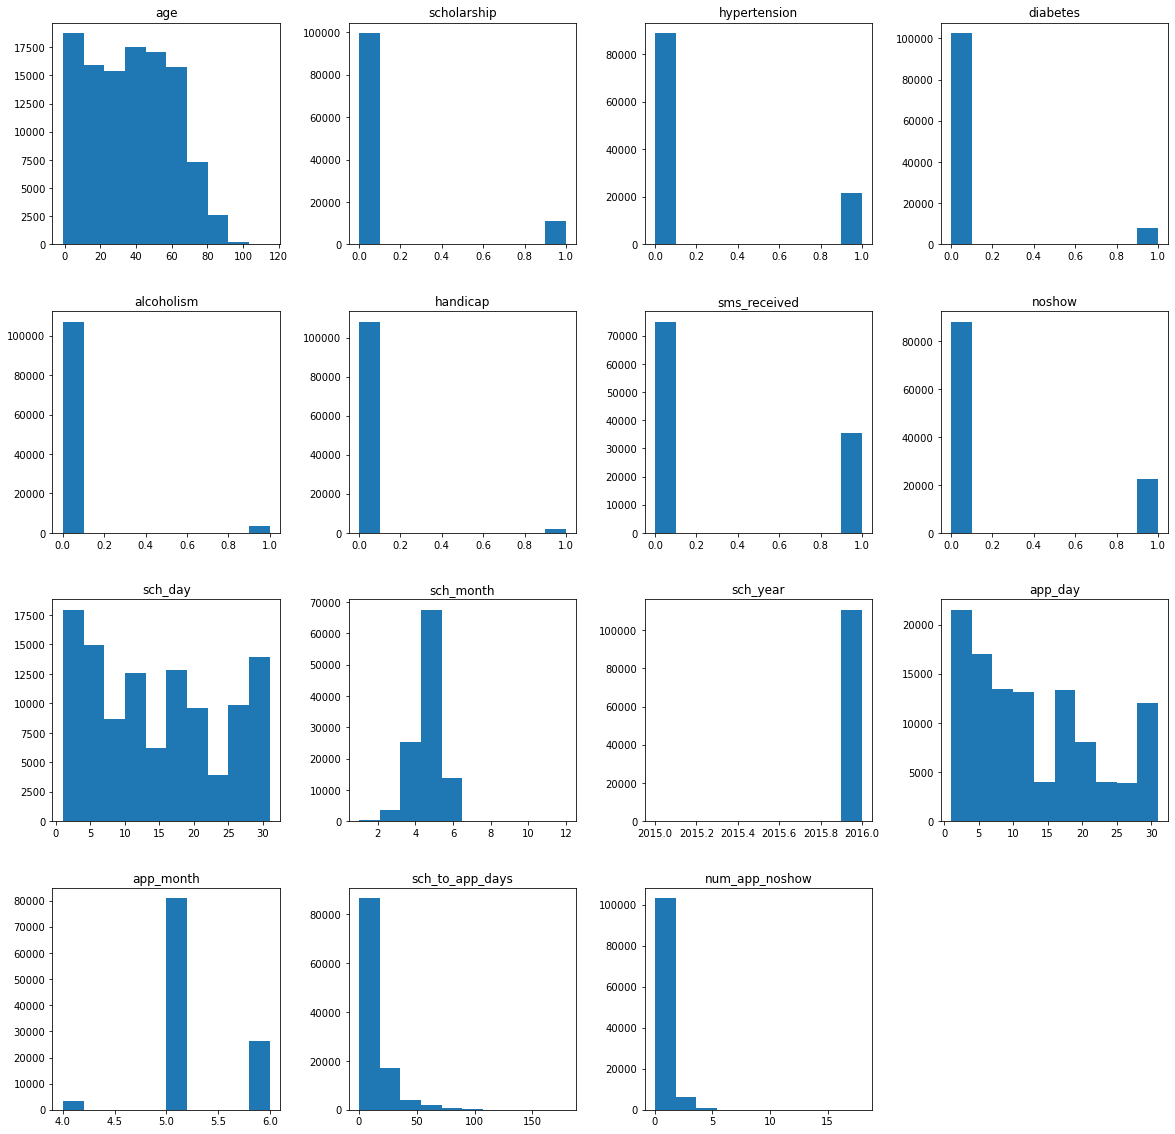

In [30]:
df. loc[:, df. columns != 'patientid'].hist(figsize = (20,20),grid = False);


From the histograms above, we see that most of the patients were in the 0-60 age range, with none of the diseases and no scholarship nor sms received. Most of the patients did not show up. Most of the scheduling and appointment month were in may and year 2016. Most of the times there were 0 to 10 days between schedule and appointment day. <br>
More details in the following graphs.

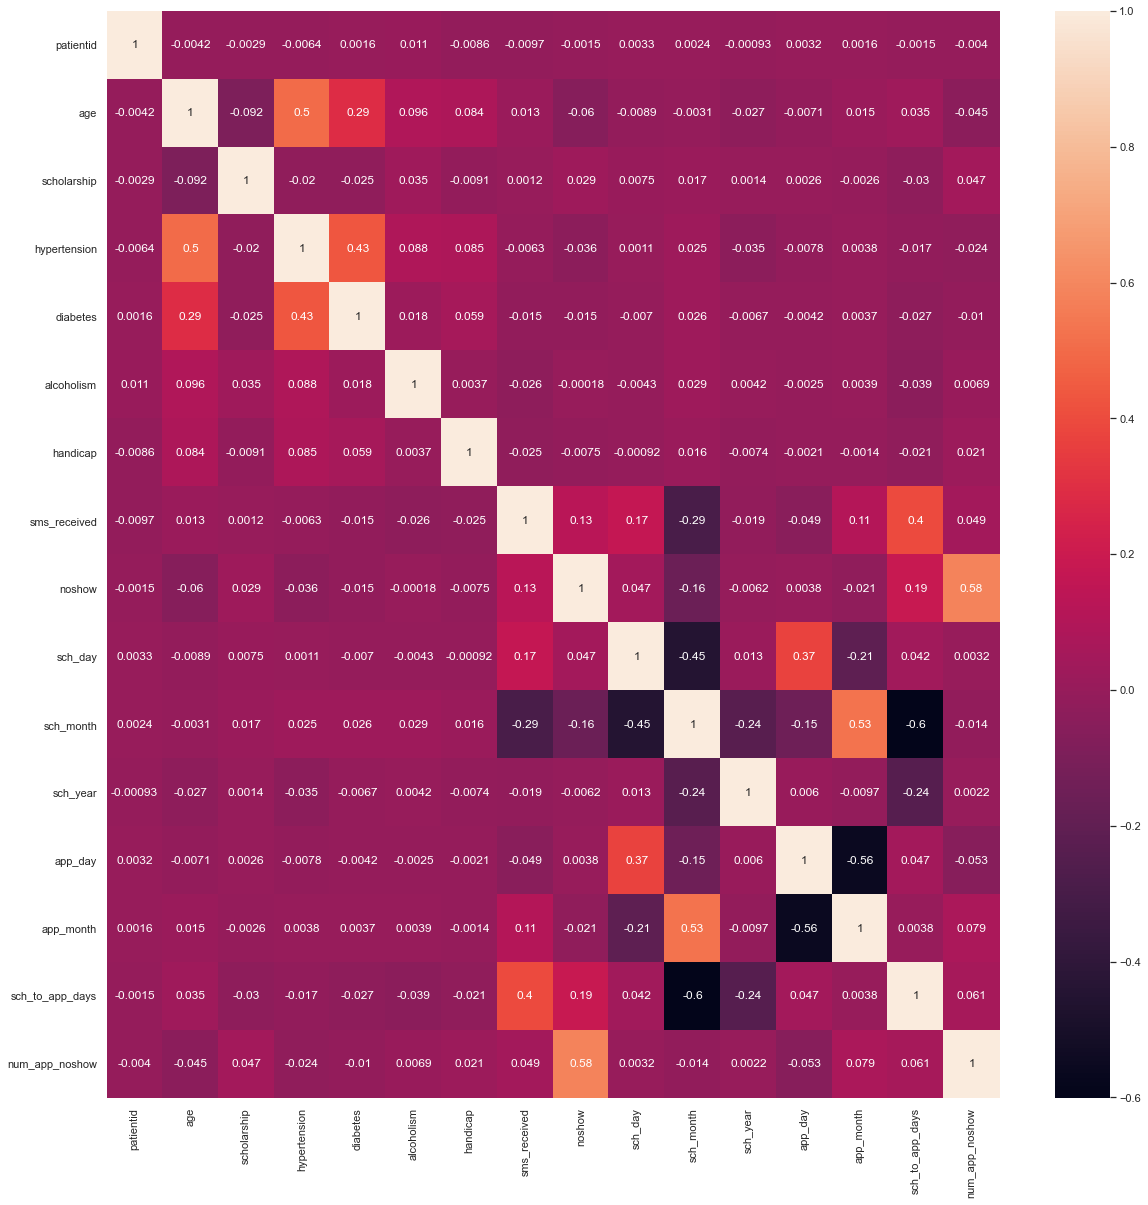

In [31]:
cor_matrix = df.corr()
sns.set(rc = {'figure.figsize':(20,20)})
sns.heatmap(cor_matrix, annot = True)
plt.show()

From the correlation matrix above, we see that the highest positive correlation exist between appointmnt month and scheduling month with a value of 0.53, and a negative correlation between number of days between scheduling and appointment and scheduling month, with a value of -0.6.

In [32]:
# Let's create a function to find the percentage of calue counts and plot theri respective barplots
'''Function to take any column from the dataset and produce a barplot with percentage of each category
    INPUT: Column Name
    OUTPUT: Barplot '''

def bar_percent(col):
    print("The percentage of 0 and 1 of {} is: {}".format(col,round(df[col].value_counts()/len(df)*100,2)))
    round(df[col].value_counts()/len(df)*100,2).plot(kind = "bar")
    sns.set(rc = {'figure.figsize':(6,6)})
    plt.ylabel("Count")
    plt.title(col);

The percentage of 0 and 1 of noshow is: 0    79.81
1    20.19
Name: noshow, dtype: float64


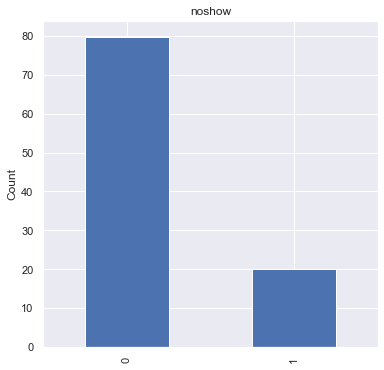

In [57]:
bar_percent('noshow')

20.19% of all patients did not show up to their appointment. Let's look at this value with a pie chart as well.

The percentage of 0 and 1 of gender is: F    65.0
M    35.0
Name: gender, dtype: float64


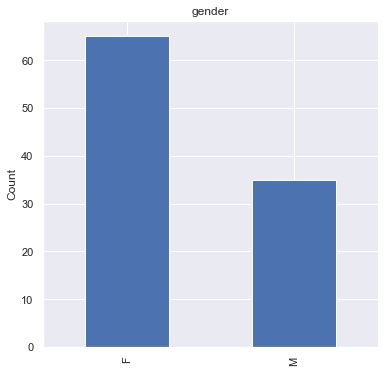

In [34]:
bar_percent('gender')

65% of the patients are females.

The percentage of 0 and 1 of sms_received is: 0    67.9
1    32.1
Name: sms_received, dtype: float64


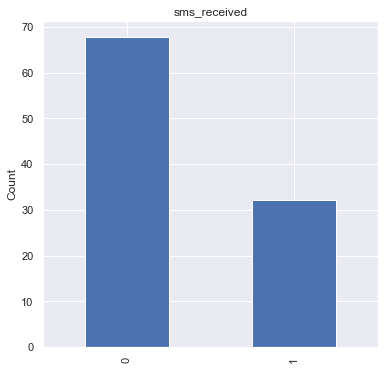

In [35]:
bar_percent('sms_received')

67.9% did not receive an sms.

The percentage of 0 and 1 of scholarship is: 0    90.17
1     9.83
Name: scholarship, dtype: float64


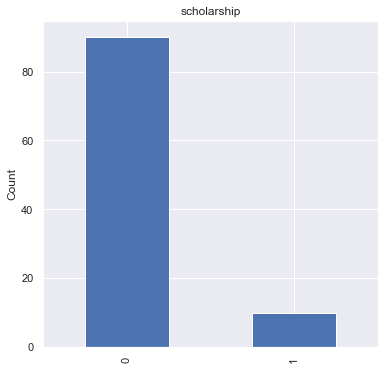

In [36]:
bar_percent('scholarship')

90.17% of patient do not have a scholarship.

The percentage of 0 and 1 of handicap is: 0    97.97
1     2.03
Name: handicap, dtype: float64


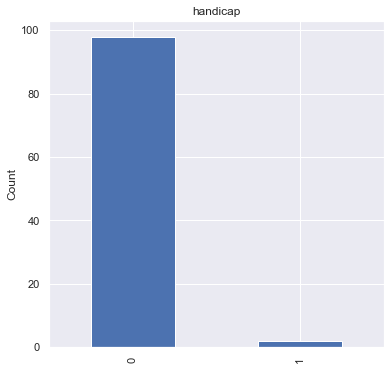

In [37]:
bar_percent('handicap')

Only 2.03% are handicapped.

The percentage of 0 and 1 of diabetes is: 0    92.81
1     7.19
Name: diabetes, dtype: float64


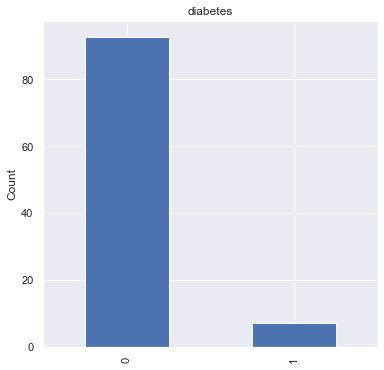

In [38]:
bar_percent('diabetes')

7.33% have diabetes.

The percentage of 0 and 1 of alcoholism is: 0    96.96
1     3.04
Name: alcoholism, dtype: float64


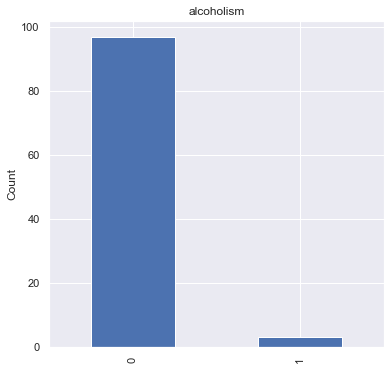

In [39]:
bar_percent('alcoholism')

3.21% are alcohlic.

Now let's explore non-binary variables.

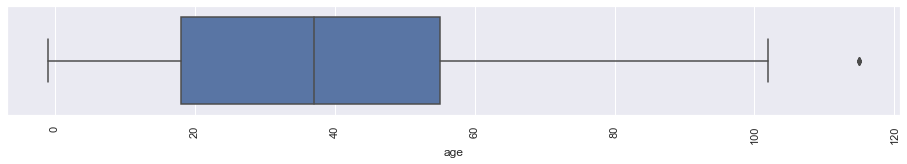

In [40]:
# Let's create a boxplot of age distribution
plt.figure(figsize = (16,2))
plt.xticks(rotation = 90)
_ = sns.boxplot(x = df.age)

We see that most records are between 18 and 55 of age with one outlier close 115.

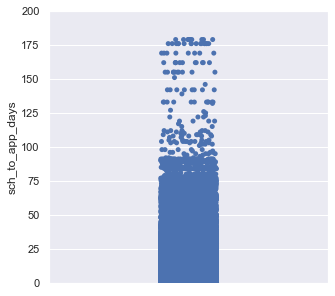

In [41]:
#Now let's see how the sch_to_app_days was distributed
sns.set(rc={'figure.figsize':(5,5)})
sns.stripplot(data = df, y = 'sch_to_app_days', jitter = True)
plt.ylim(0, 200)
plt.show();

Appointments were set to within 180 days from the scheduling day, with highest concentration in the first 75 days.

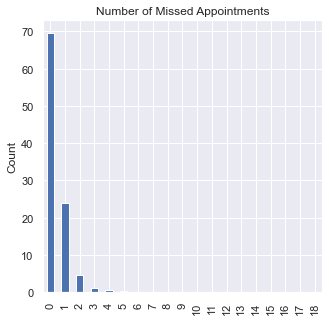

In [42]:
#Number of missed appointments
round(df['num_app_noshow'].value_counts()/len(df)*100,2).plot(kind = "bar")
sns.set(rc = {'figure.figsize':(6,6)})
plt.ylabel("Count")
plt.title('Number of Missed Appointments');

In [43]:
df['num_app_noshow'].value_counts()

0     76832
1     26292
2      5104
3      1349
4       478
5       199
6       103
7        41
8        36
9        20
10       19
11       14
12       14
13        5
14        4
15        3
16        2
17        1
18        1
Name: num_app_noshow, dtype: int64

Most of the patients had 0 missed appointments followed by 1 missed appointment.

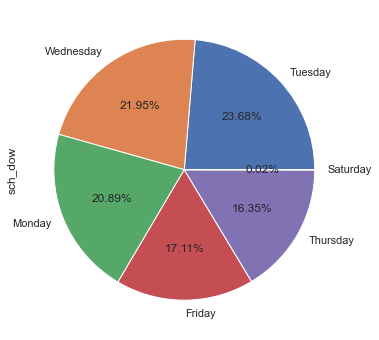

In [44]:
#Let's finally look at the days of the week with highest appointment and scheduling activities
df.sch_dow.value_counts().plot.pie(figsize = (6,6),autopct = '%.2f%%');

Most of the scheduling days were on Tuesdays and Wednesdays with 23.62% and 21.91% respectively.

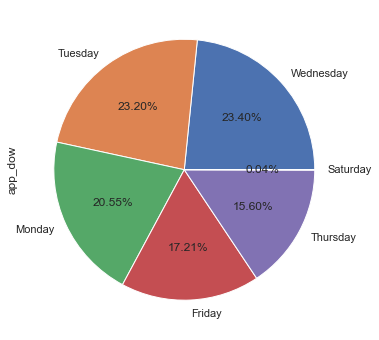

In [45]:
df.app_dow.value_counts().plot.pie(figsize = (6,6),autopct = '%.2f%%');

Most appointments were set to be on Wednesdays and Tuesdays with 23.36% and 23.15% respectively, suggesting the high amount of same day scheduling.

<a id='eda'></a>
## Exploratory Data Analysis

Now let's work on understanding what factors affect the no-show behavior in our dataset.
<a id='q1'></a>
### Is Age a factor leading to not showing up to appointments?

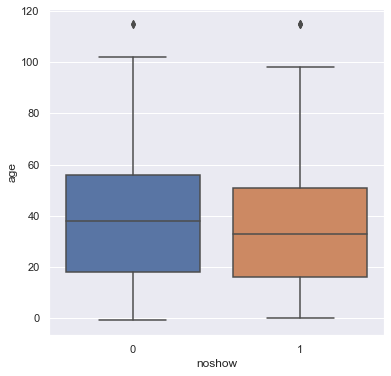

In [46]:
# Let's create a box plot of the age distribution for each No Show condition
sns.boxplot(x = df.noshow, y = df.age)
plt.show()

There is obviously no difference between the two box plots,with the overall median,25% and 75% and max being slightly lower for people who did not show. Suggesting that younger people are more likely to miss their appointment. BUT the difference is so small to have a definite conclusion.

<a id='q2'></a>
### Is Gender a factor leading to not showing up to appointments?

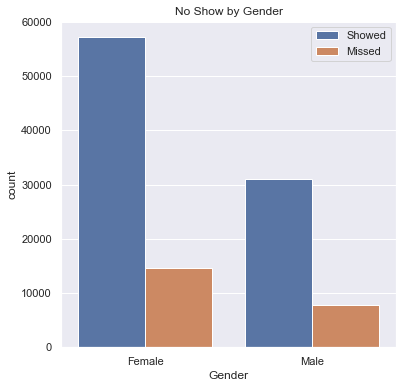

Out of all females, 0.0% missed their appointments versus 0.0% in males


In [47]:
ax = sns.countplot(x = "gender", hue = "noshow", data = df)
ax.set(title = 'No Show by Gender')
plt.xticks([0, 1], ['Female', 'Male'])
ax.set_xlabel('Gender')
L=plt.legend()
L.get_texts()[0].set_text('Showed')
L.get_texts()[1].set_text('Missed')
plt.show()

female_noshow_ratio = len(df.query('noshow == "1" and gender == "F"'))/len(df.loc[df['gender'] == "F"])
male_noshow_ratio = len(df.query('noshow == "1" and gender == "M"'))/len(df.loc[df['gender'] == "M"])
print('Out of all females, {}% missed their appointments versus {}% in males'.format(female_noshow_ratio,male_noshow_ratio))

For both genders, the no show rate was very small compared to the people who did not miss. Females had a slightly higher count of missing appointments.

<a id='q3'></a>
### Does receiving an SMS or Scholarship decrease the no show ratio?

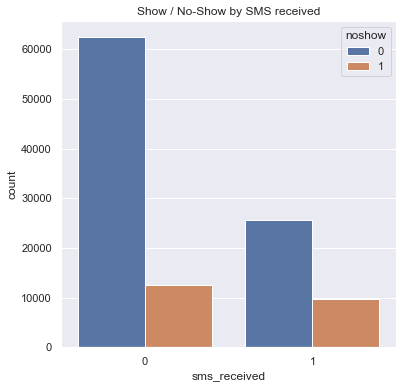

In [48]:
# Let's create a bar plot to show the count of noshows for each sms condition
ax = sns.countplot(x = df.sms_received, hue = df.noshow, data = df)
ax.set_title("Show / No-Show by SMS received")
plt.show();

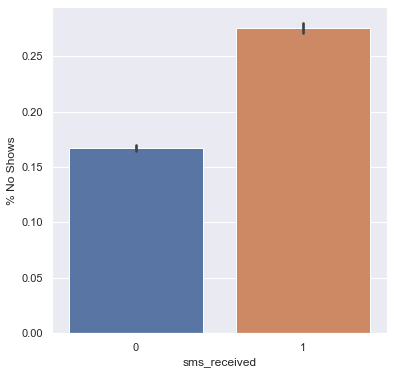

In [49]:
ax = sns.barplot(x = df.sms_received, y = df.noshow)
ax.set_ylabel('% No Shows')
plt.show()

As we can see, unexpectedly, the ratio of no shows is higher in people who received a verification SMS (0.275% versus 0.16%).

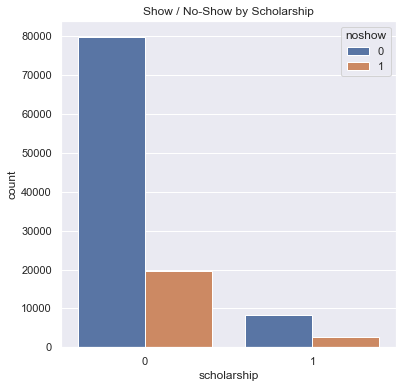

In [50]:
# Let's create a bar plot to show the count of noshows for each sms condition
ax = sns.countplot(x = df.scholarship, hue = df.noshow, data = df)
ax.set_title("Show / No-Show by Scholarship")
plt.show();

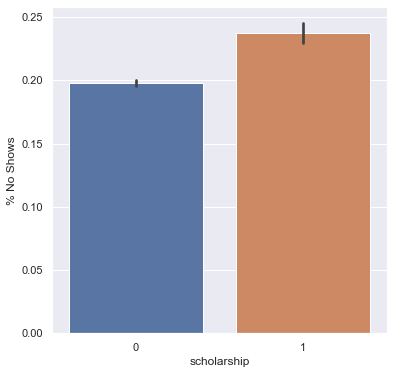

In [51]:
# Let's create a bar plot to show the percentage of noshows for each scholarship condition
ax = sns.barplot(x = df.scholarship, y = df.noshow)
ax.set_ylabel('% No Shows')
plt.show()

People with scholarship have the highest percentage of no show.

<a id='q4'></a>
### Is the appointment's Day of the Week a ruling factor in no show?

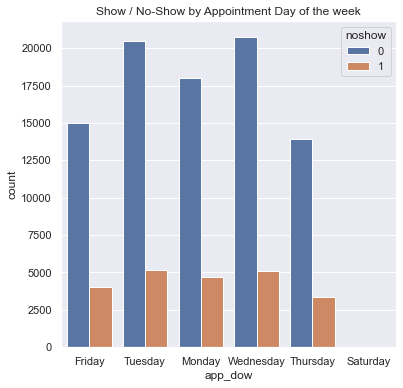

In [52]:
# Now let's see if a certain day of the week determines a higher % of no shows.
ax = sns.countplot(x = df.app_dow, hue = df.noshow, data = df)
ax.set_title("Show / No-Show by Appointment Day of the week")
plt.show();

No shows are the highest on Tuesdays and Wednesdays, and Mondays with a close value.

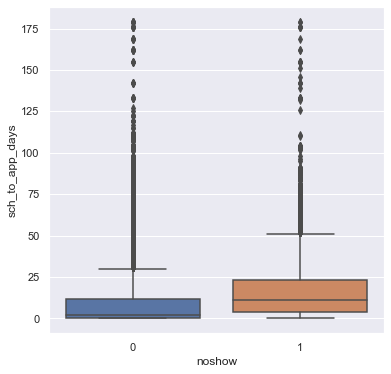

In [53]:
sns.boxplot(y = df.sch_to_app_days, x = df.noshow)
plt.show()

We can see that the no show possibility is higher with longer waiting days. People will not show more when their waiting days extend to more than 12 days.

<a id='q5'></a>
### Is the number of missed appointments a ruling factor in no show?

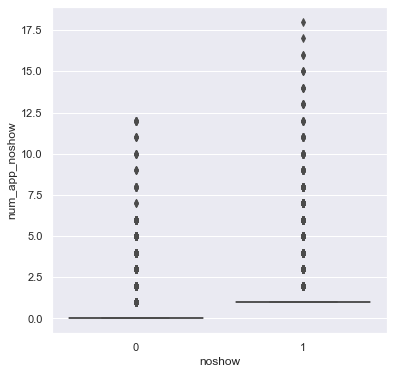

In [54]:
sns.boxplot(y = df.num_app_noshow, x = df.noshow)
plt.show()

It is clear that the number of previously missed appointments is a strong indicator of nowshow.

<a id='overview'></a>
### Overview

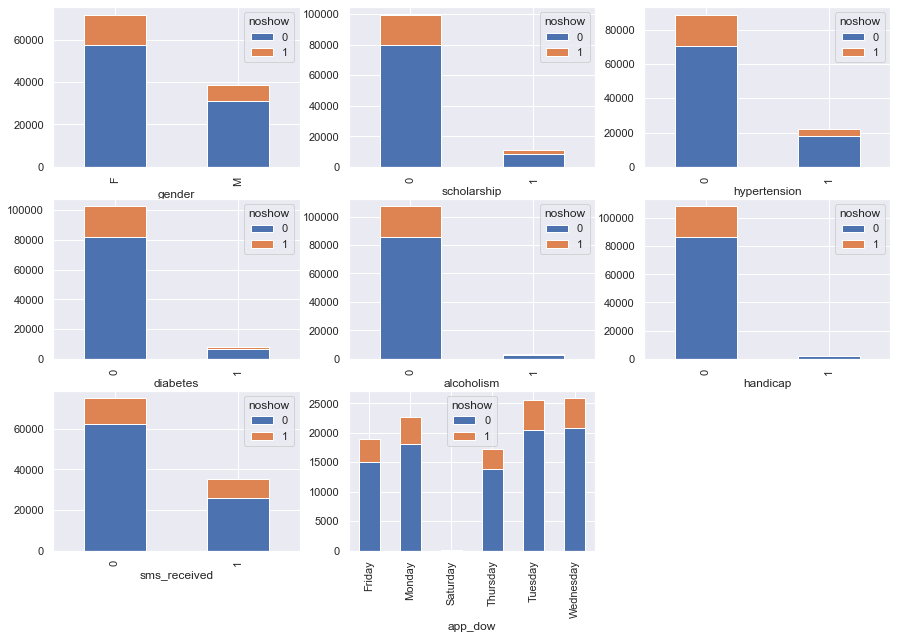

In [55]:
vars = ['gender', 'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received', 'app_dow']

fig = plt.figure(figsize =(15, 10))
for i, var in enumerate(vars):
    ax = fig.add_subplot(3, 3, i+1)
    df.groupby([var, 'noshow'])[var].count().unstack('noshow').plot(ax = ax, kind = 'bar', stacked = True)

<a id='forest'></a>
## Feature Importance

In this part, I will train a decision tree on all rows of the dataset to extract feature importance.

0.24.1
Accuracy on the whole dataset: 0.927


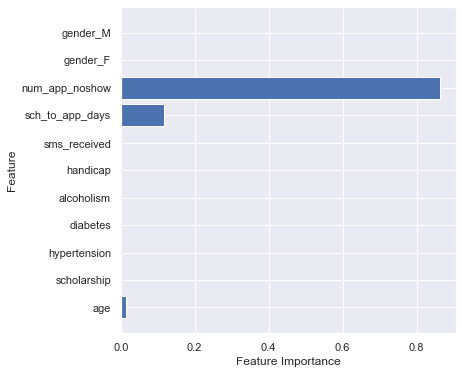

In [56]:
#import the needed packages
import sklearn
print(sklearn.__version__)
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# define dataset
#I don't include sch_day, sch_month, app_day and app_month since they are captured by sch_to_app_days
feature_cols = ['gender', 'age', 'scholarship', 'hypertension',
       'diabetes', 'alcoholism', 'handicap', 'sms_received', 'sch_to_app_days','num_app_noshow']
X = df[feature_cols] # Features
X = pd.get_dummies(X[feature_cols])
y = df['noshow'] # Target variable

#we should scale our variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
rescaledX2 = scaler.transform(X)
                
#fit a decision tree
tree = DecisionTreeClassifier(max_depth = 10, random_state = 0)
tree.fit(X, y)
print('Accuracy on the whole dataset: {:.3f}'.format(tree.score(X, y)))

#get features' importance               
n_features = X.shape[1]
plt.barh(range(n_features), tree.feature_importances_, )
plt.yticks(np.arange(n_features), X)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

Since I am just interested in the feature importance, I did not split the data into train and test. We see that thee number of missed appointment followed by the number of days between scheduling and appointment, followed by age are the most important features in predicting no show.

<a id='conclusions'></a>
## Conclusions

<div style="text-align: justify">In this project, I have chosen the no-show dataset to explore.I first understood how the data looks like and the variable types. <br>
I then focused on finding errors in the data whether it is spelling error, data type error, data value error. Once spotted, these errors were fixed and  the final dataset was ready for exploration.</div> 
<h3> Summary</h3>
<br>
In the statistics and visuals part, one dimension statistics was carried on. Findings were as follows:<br>
 <ul> 
    <li>Most of the patients were in the 0-60 age range, with none of the diseases and no scholarship nor sms received. Most of the patients did not show up. Most of the scheduling and appointment month were in may and year 2016. Most of the times there were 0 to 10 days between schedule and appointment day.</li>
    <li>20.19% of all patients did not show up to their appointment. Let's look at this value with a pie chart as well.
    <li>65% of the patients are females.</li>
    <li>67.9% did not receive an sms.</li>
    <li>90.17% of patient do not have a scholarship.</li>
    <li>Only 2.03% are handicapped.</li>
    <li>7.33% have diabetes.</li>
    <li>3.21% are alcohlic.</li>
    <li>Most patients are between 18 and 55 of age with one outlier close 115.</li>
    <li>Appointments were set to within 180 days from the scheduling day, with highest concentration in the first 75 days.</li>
    <li>Most of the patients had 0 missed appointments followed by 1 missed appointment.</li>
    <li>Most of the scheduling days were on Tuesdays and Wednesdays.</li>
    <li>Most appointments were set to be on Wednesdays and Tuesdays, suggesting the high amount of same day scheduling.</li>
 </ul>

After the one dimensional study, I asked five research questions to understad what impacts the no show behavior the most.
<ol>
    <li>Is Age a factor leading to not showing up to appointments? <br>
  The generated boxplot  suggests that younger people are more likely to miss their appointment. BUT the difference is so small to have a definite conclusion.</li>
    <li>Is Gender a factor leading to not showing up to appointments?<br>
    For both genders, the no show rate was very small compared to the people who did not miss. Females had a slightly higher count of missing appointments.</li>
    <li>Does receiving an SMS or Scholarship decrease the no show ratio?<br>
    Unlike what one would think, the ratio of no shows is higher in people who did receive a verification SMS and in the people with scholarship.
    </li>
    <li>Is the appointment's Day of the Week a ruling factor in no show?<br>
    No shows are the highest on Tuesdays and Wednesdays. Also, people will not show more when their waiting days extend to more than 12 days.
    </li>
    <li>Is the number of missed appointments a ruling factor in no show? <br>
    The number of previously missed appointments is a strong indicator of nowshow.</li>
</ol>
<br>
<div style="text-align: justify">After the research questions, I wanted to conduct a prediction method to double check on the feature importance since the statistics and research questions did not offer a strong conclusion. Therefore, I chose to conduct a decision tree on the whole data since I am only interested in the feature importance. The decision tree confirmed that the number of previously missed appointment, the number of days between scheduling and appointment as well as age are the only and most important factors in studying the no show behavior.</div><br> 
<h3> Limitations and Suggestions </h3>
<br>
<div style="text-align: justify">In this study, no statistical tests were done and therefore none of the conclusions is final.<br>
This data could use more variables on the scheduling and appointment days as these are the most influencial. <br>
Neighborhoos could be used if the data provided some sort of distance between the area and the medical center, otherwise, there are a large amount of neighbourhoods listed, making this variable invaluable. <br>
The time span on this data is considerably small to be able to draw conclusive observations. <br>
It could be useful to also provide the number of people accompanying the patient to see if patients coming alone are more prone to missing their future appointments or not.</div>
